## **The Script Foundation Task 2:**
## **Exploring Supervised Machine Learning**

### **Task**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Dataset Preparation


In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# Importing data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")



Data imported successfully


In [4]:
# display the first 10 rows
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# explore the dataset

#check if any null values are present in the datset
df.isnull().sum()


#check the columns present in the dataset
df.columns


#print the number of rows and columns of dataset
df.shape

(25, 2)

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## plotting the graph

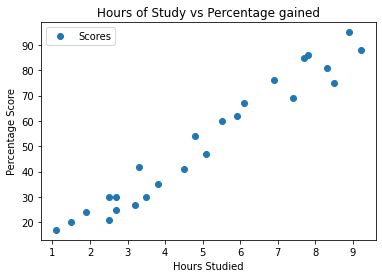

In [7]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours of Study vs Percentage gained')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

we divide the data into "attributes" (inputs) and "labels" (outputs).

In [8]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Model**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [10]:
from sklearn.linear_model import LinearRegression  
regr = LinearRegression()  
regr.fit(X_train, y_train) 

print("Model Training is complete")

Model Training is complete


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


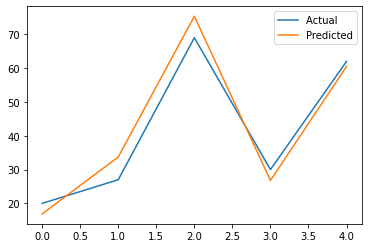

In [11]:
# using the model to predict on test dataset and plot the output 

print(X_test)
y_predicted = regr.predict(X_test)
compare_val = pd.DataFrame({'Actual ': y_test, 'Predicted': y_predicted})
compare_val.plot()

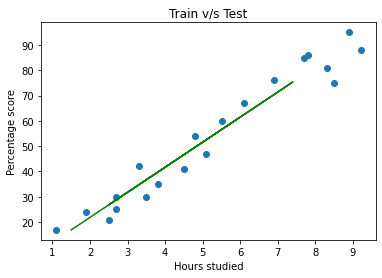

In [14]:
# Train v/s Test data plot
plt.scatter(x = X_train, y = y_train)
plt.plot(X_test, y_predicted, color = 'green')
plt.title('Train v/s Test')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

In [16]:
#accuracy of trained model
from sklearn import metrics
print("Training accuracy: {} %".format(regr.score(X_train,y_train)*100))
print("Testing accuracy: {} %".format(regr.score(X_test,y_test)*100))
print("Mean absolute error: ",metrics.mean_absolute_error(y_test, y_predicted))


Training accuracy: 95.15510725211553 %
Testing accuracy: 94.54906892105355 %
Mean absolute error:  4.183859899002975


### **Making Predictions**

## Question 1: What will be predicted score if a student study for 9.25 hrs in a day?


In [20]:
hours = 9.25
own_pred = regr.predict([[hours]])
print("Number of Hours studied = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours studied = 9.25
Predicted Score = 93.69173248737535


In [22]:
#save the model
import pickle
filename = 'student_score.h5'
pickle.dump(regr, open(filename, 'wb'))

In [23]:
#load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))